In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy
import sklearn
import pyrosm

from tqdm import tqdm

from datetime import datetime, timedelta

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
train_orders = pd.read_csv('orders.csv')
train_orders

,Id,running_time,completed_time,route_distance_km,delta_time,bus,public_transport,highway,crossing,traffic_signals,operator,trolleybus,railway,barrier
0,-4773019581999572651,2022-01-24 18:30:21,2022-01-24 18:44:43,3.740,862.0,10,10,20,7,1,4,4,1,0
1,-7575630690398473489,2022-01-24 06:53:53,2022-01-24 07:06:26,3.526,753.0,0,1,5,1,0,1,1,0,1
2,-6264582368520213833,2022-01-24 10:00:59,2022-01-24 10:15:58,5.071,899.0,6,6,14,11,3,6,6,1,0
3,5964315354301636538,2022-01-24 14:28:05,2022-01-24 14:35:08,2.867,423.0,2,2,6,0,6,0,0,0,0
4,1372379574816145639,2022-01-24 11:57:29,2022-01-24 12:06:29,3.751,540.0,5,5,11,7,0,4,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,7096714159023973792,2022-01-24 21:10:38,2022-01-24 21:23:53,7.397,795.0,18,18,9,4,2,7,7,0,0
4996,-3836026425968071806,2022-01-24 15:10:27,2022-01-24 15:20:21,1.948,594.0,0,0,0,0,0,0,0,0,0
4997,2926216435675216636,2022-01-24 13:57:04,2022-01-24 14:03:18,2.547,374.0,0,0,7,1,0,0,0,0,0
4998,-6677307480063489707,2022-01-24 08:46:13,2022-01-24 08:55:34,3.013,561.0,3,3,2,1,1,3,3,1,0


In [4]:
nodes = pd.read_csv('nodes.csv')
nodes

,Id,node_start,node_finish,distance,speed
0,-2627062893189810184,10980432,2133368107,17.414917,32.0
1,-2627062893189810184,10980433,5212387954,17.186539,26.0
2,-2627062893189810184,10980445,5221700954,28.513481,26.0
3,-2627062893189810184,10980498,10980445,154.266122,25.0
4,-2627062893189810184,10980647,1986137911,8.542824,29.0
...,...,...,...,...,...
480286,-8229597404562288405,8952439761,317189358,4.847930,23.0
480287,-8229597404562288405,8952439762,8952439761,131.325685,26.0
480288,-8229597404562288405,8952439763,8952439762,44.026544,38.0
480289,-8229597404562288405,8952439764,8952439763,0.111226,34.0


In [5]:
train_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 5000 non-null   int64  
 1   running_time       5000 non-null   object 
 2   completed_time     5000 non-null   object 
 3   route_distance_km  5000 non-null   float64
 4   delta_time         5000 non-null   float64
 5   bus                5000 non-null   int64  
 6   public_transport   5000 non-null   int64  
 7   highway            5000 non-null   int64  
 8   crossing           5000 non-null   int64  
 9   traffic_signals    5000 non-null   int64  
 10  operator           5000 non-null   int64  
 11  trolleybus         5000 non-null   int64  
 12  railway            5000 non-null   int64  
 13  barrier            5000 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 547.0+ KB


In [6]:
nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480291 entries, 0 to 480290
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Id           480291 non-null  int64  
 1   node_start   480291 non-null  int64  
 2   node_finish  480291 non-null  int64  
 3   distance     480291 non-null  float64
 4   speed        476307 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 18.3 MB


## Insides

There are blind spots, however, they are mostly insignificant, therefore, we may not 

In [7]:
train_orders[train_orders['Id'] == -6677307480063489707]

,Id,running_time,completed_time,route_distance_km,delta_time,bus,public_transport,highway,crossing,traffic_signals,operator,trolleybus,railway,barrier
4998,-6677307480063489707,2022-01-24 08:46:13,2022-01-24 08:55:34,3.013,561.0,3,3,2,1,1,3,3,1,0


In [8]:
nodes[nodes['Id'] == -6677307480063489707]['distance'].sum()

2473.299894999999

Our data is basicly for one day

In [9]:
train_orders['completed_time'].apply(lambda row: row.split()[0]).value_counts()

2022-01-24    4992
2022-01-25       8
Name: completed_time, dtype: int64

Order node counts

(array([165., 376., 682., 779., 764., 792., 654., 524., 368., 303., 260.,
        133.,  86.,  46.,  28.,  18.,   9.,   5.,   4.,   4.]),
 array([  4. ,  17.4,  30.8,  44.2,  57.6,  71. ,  84.4,  97.8, 111.2,
        124.6, 138. , 151.4, 164.8, 178.2, 191.6, 205. , 218.4, 231.8,
        245.2, 258.6, 272. ]),
 <BarContainer object of 20 artists>)

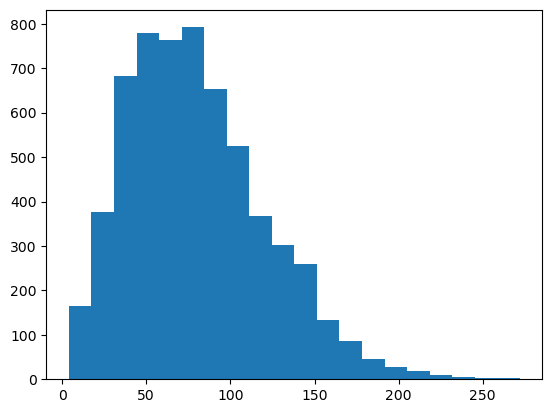

In [10]:
plt.hist(nodes['Id'].value_counts(), bins=20)

Mean time

In [11]:
train_orders['delta_time'].mean()/60

10.21936

(array([  2.,  15.,  33., 108., 163., 239., 295., 318., 326., 341., 323.,
        378., 367., 337., 342., 306., 287., 300., 255., 265.]),
 array([ 0.83333333,  1.62416667,  2.415     ,  3.20583333,  3.99666667,
         4.7875    ,  5.57833333,  6.36916667,  7.16      ,  7.95083333,
         8.74166667,  9.5325    , 10.32333333, 11.11416667, 11.905     ,
        12.69583333, 13.48666667, 14.2775    , 15.06833333, 15.85916667,
        16.65      ]),
 <BarContainer object of 20 artists>)

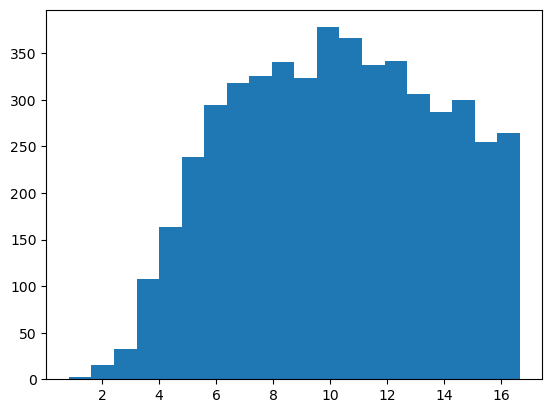

In [12]:
plt.hist(train_orders['delta_time']/60, bins=20)

Mean route

(array([ 28., 354., 911., 983., 809., 697., 489., 317., 216., 108.,  38.,
         22.,  16.,   4.,   2.,   1.,   2.,   1.,   0.,   2.]),
 array([ 0.    ,  0.7977,  1.5954,  2.3931,  3.1908,  3.9885,  4.7862,
         5.5839,  6.3816,  7.1793,  7.977 ,  8.7747,  9.5724, 10.3701,
        11.1678, 11.9655, 12.7632, 13.5609, 14.3586, 15.1563, 15.954 ]),
 <BarContainer object of 20 artists>)

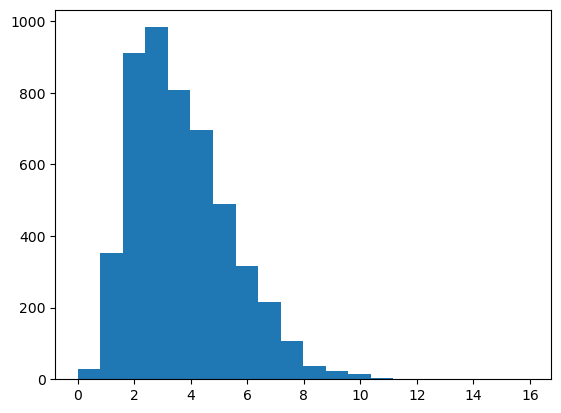

In [13]:
plt.hist(train_orders['route_distance_km'], bins=20)

In [14]:
train_orders['route_distance_km'].mean()

3.7059451999999817

## Geodata

In [15]:
def get_geodata(path):
    osm = pyrosm.OSM(filepath=path)
    drive_net = osm.get_network(network_type="driving", nodes=True)

    geodata = drive_net[0]
    geodata['tags'] = geodata['tags'].apply(lambda row: {} if row is None else row)
    return geodata

In [16]:
def not_in_odesa(nodes, geodata):
    indexes = []
    ids = list(geodata['id'].unique())
    for node in nodes['node_start'].unique():
        if node not in ids:
            indexes.extend(list(nodes.index[nodes['node_start'] == node]))
#     for node in nodes['node_finish'].unique():
#         if node not in ids:
#             indexes.extend(list(nodes.index[nodes['node_finish'] == node]))
    return list(set(indexes))

In [17]:
PATH = 'C:/Users/andrk/Notebooks/INT20H/geodata/odessa_oblast-latest.osm.pbf'
odesa_geodata = get_geodata(path=PATH)

In [18]:
outlying_indexes = not_in_odesa(nodes, odesa_geodata)

In [19]:
nodes.drop(outlying_indexes, inplace=True)

geodata_nodes = odesa_geodata[odesa_geodata['id'].isin(nodes['node_start'].unique())]

In [20]:
def parse(keys, dataframe):
    for key in keys:
        dataframe[key] = 0

In [21]:
def create_columns(geodata_nodes, column='tags'):
    geodata_nodes[column].apply(lambda row: parse(row.keys(), geodata_nodes))
    
    for i in tqdm(geodata_nodes.index):
        for key in geodata_nodes[column].loc[i].keys():
            geodata_nodes[key].loc[i] = geodata_nodes[column].loc[i][key]
    

In [22]:
create_columns(geodata_nodes)

100%|█████████████████████████████████████████████████████████████████████████| 17871/17871 [00:01<00:00, 15455.99it/s]


In [ ]:
ref_name, 

In [23]:
features = ['bus', 'public_transport', 'highway',
                    'crossing','traffic_signals', 'operator',
                    'trolleybus', 'railway', 'barrier']

In [24]:
geodata_nodes = geodata_nodes[['lon', 'lat', 'id'] + features]

In [25]:
def fill_features(row):
    for feature in features:
        if row[feature] != 0:
            row[feature] = 1
    return row

In [26]:
geodata_nodes = geodata_nodes.apply(lambda row: fill_features(row), axis=1)

In [27]:
geodata_nodes

,lon,lat,id,bus,public_transport,highway,crossing,traffic_signals,operator,trolleybus,railway,barrier
0,30.726735,46.417998,4374904173,1,1,0,0,0,0,0,0,0
1,30.728752,46.418113,352682638,0,0,0,0,0,0,0,0,0
2,30.729990,46.418192,2142884470,0,0,0,0,0,0,0,0,0
3,30.730786,46.418242,3085790909,0,0,0,0,0,0,0,0,0
4,30.733380,46.418398,27126458,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
514396,30.678566,46.488071,4777121860,0,0,0,0,0,0,0,0,0
514397,30.677869,46.488334,4777121861,0,0,0,0,0,0,0,0,0
514950,30.734083,46.399311,2141798094,0,0,1,0,0,0,0,0,0
515163,30.734085,46.399132,2141798105,0,0,1,0,0,0,0,0,0


In [28]:
def create_geo_features(orders, nodes, geodata, features):
    orders[features] = 0
    
    for i in orders.index:
        order_id = orders.loc[i]['Id']
        order_start_nodes = nodes[nodes['Id'] == order_id]['node_start']
        order_geodata = geodata[geodata['id'].isin(order_start_nodes)][features].sum(axis=0)
        orders.loc[i, features] = order_geodata

In [30]:
train_orders

,Id,running_time,completed_time,route_distance_km,delta_time,bus,public_transport,highway,crossing,traffic_signals,operator,trolleybus,railway,barrier
0,-4773019581999572651,2022-01-24 18:30:21,2022-01-24 18:44:43,3.740,862.0,11,11,23,7,1,4,4,1,0
1,-7575630690398473489,2022-01-24 06:53:53,2022-01-24 07:06:26,3.526,753.0,0,1,6,1,0,1,1,0,1
2,-6264582368520213833,2022-01-24 10:00:59,2022-01-24 10:15:58,5.071,899.0,6,6,14,11,3,6,6,2,0
3,5964315354301636538,2022-01-24 14:28:05,2022-01-24 14:35:08,2.867,423.0,2,2,7,1,6,0,0,0,0
4,1372379574816145639,2022-01-24 11:57:29,2022-01-24 12:06:29,3.751,540.0,5,5,11,7,0,4,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,7096714159023973792,2022-01-24 21:10:38,2022-01-24 21:23:53,7.397,795.0,19,19,14,5,3,7,7,0,0
4996,-3836026425968071806,2022-01-24 15:10:27,2022-01-24 15:20:21,1.948,594.0,0,0,0,0,0,0,0,0,0
4997,2926216435675216636,2022-01-24 13:57:04,2022-01-24 14:03:18,2.547,374.0,1,1,7,1,0,1,1,0,0
4998,-6677307480063489707,2022-01-24 08:46:13,2022-01-24 08:55:34,3.013,561.0,4,4,2,1,1,3,3,2,0


In [31]:
weather_data = pd.read_csv('UKOO_3.csv')

In [32]:
weather_data

,station,valid,lon,lat,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,vsby,gust,skyc1,skyc2,skyc3,skyc4,skyl1,skyl2,skyl3,skyl4,wxcodes,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar,snowdepth
0,UKOO,2022-01-24 00:00,30.7667,46.4333,24.8,21.2,85.96,360.0,15.55,0.0,30.27,NaN,2.86,NaN,SCT,BKN,NaN,NaN,1300.0,1800.0,NaN,NaN,-SHSN BR,NaN,NaN,NaN,NaN,NaN,NaN,11.22,UKOO 240000Z 36008MPS 4600 -SHSN BR SCT013CB B...,NaN
1,UKOO,2022-01-24 01:00,30.7667,46.4333,24.8,23.0,92.74,360.0,15.55,0.0,30.27,NaN,3.73,NaN,SCT,BKN,NaN,NaN,1100.0,3300.0,NaN,NaN,-SHSN,NaN,NaN,NaN,NaN,NaN,NaN,11.22,UKOO 240100Z 36008MPS 6000 -SHSN SCT011CB BKN0...,NaN
2,UKOO,2022-01-24 02:00,30.7667,46.4333,24.8,23.0,92.74,360.0,15.55,0.0,30.27,NaN,4.35,NaN,SCT,BKN,NaN,NaN,1000.0,2700.0,NaN,NaN,-SHSN,NaN,NaN,NaN,NaN,NaN,NaN,11.22,UKOO 240200Z 36008MPS 7000 -SHSN SCT010CB BKN0...,NaN
3,UKOO,2022-01-24 03:00,30.7667,46.4333,26.6,23.0,86.07,360.0,17.49,0.0,30.27,NaN,6.21,NaN,SCT,BKN,NaN,NaN,1100.0,3300.0,NaN,NaN,-SHSN,NaN,NaN,NaN,NaN,NaN,NaN,12.82,UKOO 240300Z 36009MPS 9999 -SHSN SCT011CB BKN0...,NaN
4,UKOO,2022-01-24 04:00,30.7667,46.4333,24.8,21.2,85.96,360.0,17.49,0.0,30.27,NaN,6.21,NaN,NSC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-SN,NaN,NaN,NaN,NaN,NaN,NaN,10.46,UKOO 240400Z 36009MPS 9999 -SN NSC M04/M06 Q10...,NaN
5,UKOO,2022-01-24 05:00,30.7667,46.4333,24.8,21.2,85.96,360.0,19.44,0.0,30.30,NaN,6.21,NaN,SCT,NaN,NaN,NaN,1400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.76,UKOO 240500Z 36010MPS 9999 SCT014 M04/M06 Q102...,NaN
6,UKOO,2022-01-24 06:00,30.7667,46.4333,24.8,21.2,85.96,360.0,17.49,0.0,30.30,NaN,6.21,NaN,FEW,NaN,NaN,NaN,1500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.46,UKOO 240600Z 36009MPS 9999 FEW015 M04/M06 Q102...,NaN
7,UKOO,2022-01-24 07:00,30.7667,46.4333,24.8,21.2,85.96,360.0,17.49,0.0,30.33,NaN,6.21,NaN,SCT,NaN,NaN,NaN,1400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.46,UKOO 240700Z 36009MPS 9999 SCT014 M04/M06 Q102...,NaN
8,UKOO,2022-01-24 08:00,30.7667,46.4333,26.6,19.4,73.89,360.0,21.38,0.0,30.33,NaN,6.21,NaN,SCT,NaN,NaN,NaN,1600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.53,UKOO 240800Z 36011MPS 9999 SCT016 M03/M07 Q102...,NaN
9,UKOO,2022-01-24 09:00,30.7667,46.4333,26.6,19.4,73.89,360.0,21.38,0.0,30.33,NaN,6.21,31.1,BKN,NaN,NaN,NaN,1800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.53,UKOO 240900Z 36011G16MPS 9999 BKN018 M03/M07 Q...,NaN


In [33]:
def get_weather_data(weather_data):
    weather_data['tmpc'] = (weather_data['tmpf'] - 32) * 5/9
    weather_data['smps'] = weather_data['sknt'] * 0.514444
    weather_data['vsby'] = weather_data['vsby'] * 1.60934
    weather_data['feel'] = (weather_data['feel'] - 32) * 5/9

    weather_features = ['valid', 'tmpc', 'relh', 'smps', 'vsby', 'wxcodes', 'feel']
    weather_data = weather_data[weather_features].fillna('0')
    
    weather_data['wxcodes'] = weather_data['wxcodes'].apply(lambda row: row.split(' '))
    weather_codes = []
    for item in weather_data['wxcodes']:
        weather_codes.extend(item)
        
    weather_codes = list(set(weather_codes))
    weather_codes.remove('0')
    
    weather_types = ['freezing_fog', 'light_snow', 'heavy_snow_showers', 'moderate_snow_showers',
                 'light_snow_showers', 'drifting_snow', 'light_fog']
    weather_dict = {weather_codes[i]: weather_types[i] for i in range(len(weather_types))}
    
    for weather_type in weather_dict.values():
        weather_data[weather_type] = 0
    
    for hour in weather_data.index:
        for weather_type in weather_dict.keys():
            if weather_type in weather_data['wxcodes'][hour]:
                weather_data[weather_dict[weather_type]][hour] = 1
                
    weather_data = weather_data.drop(['wxcodes'], axis=1)
    
    return weather_data

In [34]:
new_weather_data = get_weather_data(weather_data)

In [35]:
new_weather_data

,valid,tmpc,relh,smps,vsby,feel,freezing_fog,light_snow,heavy_snow_showers,moderate_snow_showers,light_snow_showers,drifting_snow,light_fog
0,2022-01-24 00:00,-4.0,85.96,7.999604,4.602712,-11.544444,0,1,0,0,1,0,0
1,2022-01-24 01:00,-4.0,92.74,7.999604,6.002838,-11.544444,0,1,0,0,0,0,0
2,2022-01-24 02:00,-4.0,92.74,7.999604,7.000629,-11.544444,0,1,0,0,0,0,0
3,2022-01-24 03:00,-3.0,86.07,8.997626,9.994001,-10.655556,0,1,0,0,0,0,0
4,2022-01-24 04:00,-4.0,85.96,8.997626,9.994001,-11.966667,0,0,0,1,0,0,0
5,2022-01-24 05:00,-4.0,85.96,10.000791,9.994001,-12.355556,0,0,0,0,0,0,0
6,2022-01-24 06:00,-4.0,85.96,8.997626,9.994001,-11.966667,0,0,0,0,0,0,0
7,2022-01-24 07:00,-4.0,85.96,8.997626,9.994001,-11.966667,0,0,0,0,0,0,0
8,2022-01-24 08:00,-3.0,73.89,10.998813,9.994001,-11.372222,0,0,0,0,0,0,0
9,2022-01-24 09:00,-3.0,73.89,10.998813,9.994001,-11.372222,0,0,0,0,0,0,0


In [36]:
def hour_rounder(t):
    # Rounds to nearest hour by adding a timedelta hour if minute >= 30
    return str((t.replace(second=0, microsecond=0, minute=0, hour=t.hour)
               +timedelta(hours=t.minute//30)))[:-3]


In [37]:
def create_weather_features(orders, weather_data):
    orders['running_time'] = orders['running_time'].apply(pd.to_datetime)
    orders['round_running_time'] = orders['running_time'].apply(hour_rounder)
    
    orders['hour'] = orders["running_time"].apply(
        lambda x: int(str(x)[11:13]))
    
    orders.drop(["running_time"], axis=1, inplace=True)
    
    if 'completed_time' in orders.columns:
        orders.drop(['completed_time'], axis=1, inplace=True)
        
    return orders.merge(weather_data,
                        left_on='round_running_time',
                        right_on='valid').drop(['valid', 'round_running_time'], axis=1)

In [ ]:
create_geo_features(train_orders, nodes, geodata_nodes, features)
train_orders = create_weather_features(train_orders, new_weather_data)

In [ ]:
train_orders

In [ ]:
test_orders = pd.read_csv('test.csv')

In [ ]:
create_geo_features(test_orders, nodes, geodata_nodes, features)
test_orders = create_weather_features(test_orders, new_weather_data)

In [ ]:
test_orders

In [ ]:
final_test_orders = pd.read_csv('final_test.csv')
test_nodes = pd.read_csv('nodes_finaltest.csv')

In [ ]:
outlying_indexes = not_in_odesa(test_nodes, odesa_geodata)

In [ ]:
test_nodes.drop(outlying_indexes, inplace=True)

geodata_nodes = odesa_geodata[odesa_geodata['id'].isin(nodes['node_start'].unique())]

In [ ]:
create_columns(geodata_nodes)

In [ ]:
create_geo_features(final_test_orders, nodes, geodata_nodes, features)
final_test_orders = create_weather_features(final_test_orders, new_weather_data)

## Visualization

In [40]:
import osmapi as osm
api = osm.OsmApi()
def get_cords(node):
    node = api.NodeGet(node)
    lot = node["lon"]
    lat = node["lat"]
    return lot, lat

ModuleNotFoundError: No module named 'osmapi'

In [ ]:
first_pchel = nodes[nodes['Id'] == -2627062893189810184]
first_pchel

In [ ]:
long_start, lat_start = [], []

long_s, lat_s = get_cords(first_pchel['node_start'][0])
long_start.append(long_s)
lat_start.append(lat_s)

for node in first_pchel['node_finish']:
    try:
        long, lat = get_cords(node)
        long_start.append(long)
        lat_start.append(lat)
    except:
        continue

In [ ]:
import folium

In [ ]:
m = folium.Map(location = [np.mean(lat_start), np.mean(long_start)])
coords = list(zip(lat_start, long_start))
for i in range(len(coords)):
    point = folium.CircleMarker(location=coords[i], color='blue', radius=1)
    point.add_to(m)

m